# Sentiment Analysis

Sentiment analysis aims to understand the emotional tone of a text by classifying it into categories like positive, negative, or neutral. This process involves machine learning techniques to analyze the text and determine its overall sentiment.

NLTK (Natural Language Toolkit): A popular Python library for natural language processing (NLP) tasks, including sentiment analysis. NLTK provides tools for preprocessing text data, building models, and classifying sentiment.
Word Cloud: A visual representation of word frequency in a text. Words that appear more frequently are displayed larger. This can help identify prominent positive or negative words in the text.
Naive Bayes Classification: A machine learning algorithm commonly used for sentiment analysis. It calculates the probability of a text belonging to a specific sentiment class (positive, negative) based on the presence of certain words. The model is trained on labeled sentiment data and then used to predict the sentiment of new, unseen text.

# Libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from sklearn.model_selection import train_test_split
from textblob import TextBlob
from wordcloud import WordCloud,STOPWORDS
from subprocess import check_output
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/priyadarshiniramakrishnan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Reading Dataset

In [19]:
data = pd.read_csv("/Users/priyadarshiniramakrishnan/Downloads/Sentiment.csv")
# print first five lines
data.head()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona


In [20]:
# priting shape of dataset
data.shape

(13871, 21)

In [21]:
# sentiment and text columns for doing sentiment analysis
data = data[["text","sentiment"]]

In [22]:
# printing first five line of my dataset
data.head()

,text,sentiment
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive
2,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral
3,RT @RobGeorge: That Carly Fiorina is trending ...,Positive
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive


In [23]:
# cleaning text column
def cleantxt(text):
    text= re.sub(r'@[A-Za-z0-9]+', '',text)# removed @mentions
    text= re.sub(r'#', '',text)# removed # symbol
    text = re.sub(r'RT[\s]+', '',text)# rmoved RT
    text = re.sub(r'https?:\/\/\s+', '',text)# removed the hyperlink
    text = re.sub(r':+', '',text)# removed : symbol
    text = re.sub(r'--+', '',text)# removed : symbol
    text = re.sub(r'http', '',text)
    return text
data["text"] = data["text"].apply(cleantxt)

In [24]:
# printing the first five line of cleaned data
data.head()

,text,sentiment
0,How did everyone feel about the Climate Chang...,Neutral
1,Didn't catch the full GOPdebate last night. H...,Positive
2,No mention of Tamir Rice and the GOPDebate wa...,Neutral
3,That Carly Fiorina is trending hours after H...,Positive
4,GOPDebate w/ delivered the highest ratings i...,Positive


now i am adding two more columns in dataset that is subjectivity and polarity
subjectivity:Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1]
polarity: Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.


In [25]:
# creating function to get subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
# creating function to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
# creating two new column of subjectivity and polarity
data["subjectivity"] = data["text"].apply(getSubjectivity)
data["polarity"] = data["text"].apply(getPolarity)


In [26]:
# printing first five line of data after adding two new columns
data.head(10)

,text,sentiment,subjectivity,polarity
0,How did everyone feel about the Climate Chang...,Neutral,0.158333,0.125000
1,Didn't catch the full GOPdebate last night. H...,Positive,0.305556,0.450000
2,No mention of Tamir Rice and the GOPDebate wa...,Neutral,1.000000,0.100000
3,That Carly Fiorina is trending hours after H...,Positive,0.100000,0.000000
4,GOPDebate w/ delivered the highest ratings i...,Positive,0.000000,0.000000
5,"_TX ""On my first day I will rescind every ill...",Positive,0.311111,-0.050000
6,I liked her and was happy when I heard she wa...,Negative,0.900000,0.700000
7,Going on MSNBC Live with around 2 PM ET. GOP...,Neutral,0.500000,0.136364
8,"Deer in the headlights Ben Carson, may be the...",Negative,1.000000,0.000000
9,Last night's debate proved it! GOPDebate BATs...,Negative,0.066667,0.000000


First of all, splitting the dataset into a training and a testing set. The test set is the 10% of the original dataset. For this particular analysis I dropped the neutral tweets, as my goal was to only differentiate positive and negative tweets.

In [27]:
# spliting dataset in train and test data
train,test = train_test_split(data,test_size=0.1)
# removing neutral text
train = train[train.sentiment != "Neutral"]

As a next step I separated the Positive and Negative tweets of the training set in order to easily visualize their contained words. After that I cleaned the text from hashtags, mentions and links. Now they were ready for a WordCloud visualization which shows only the most emphatic words of the Positive and Negative tweets.

In [28]:
# training positive text
train_pos = train[train["sentiment"]=="positive"]
train_pos = train_pos["text"]
# training neagative text
train_neg = train[train["sentiment"]=="negative"]
train_neg = train_neg["text"]

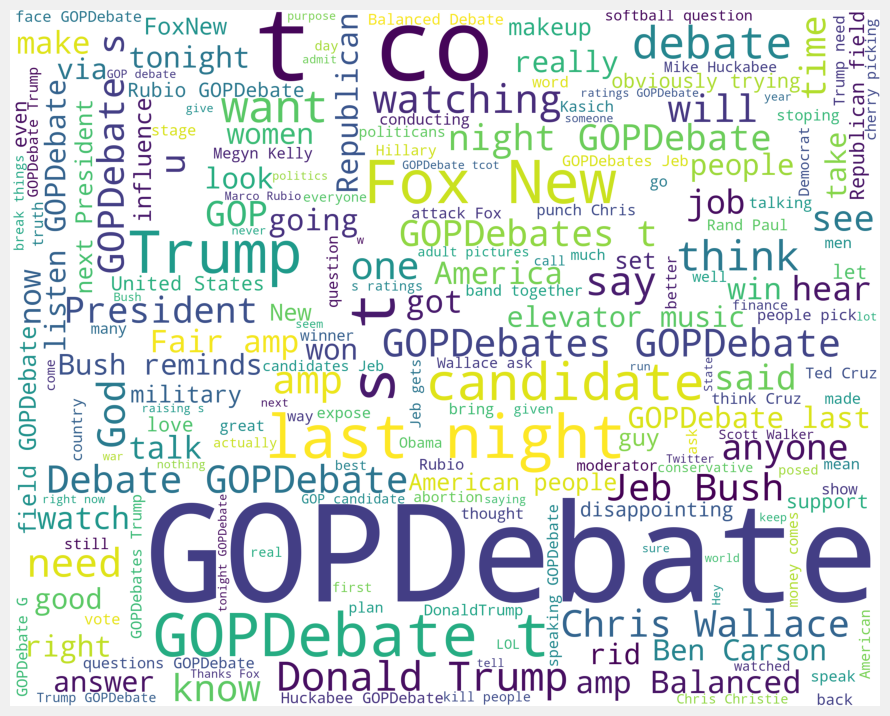

In [29]:
# WordCloud visualization
allwords = ' '.join([twts for twts in data["text"]])
wordcloud = WordCloud(width=2500,
                      height=2000,stopwords=STOPWORDS,background_color="white",random_state=21
                     ).generate(allwords)
plt.figure(1,figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [30]:
# removing the hashtags, mentions, links and stopwords from the
#training set after doing visualisation
text = []
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.text.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    text.append((words_without_stopwords, row.sentiment))

test_pos = test[ test['sentiment'] == 'Positive']
test_pos = test_pos['text']
test_neg = test[ test['sentiment'] == 'Negative']
test_neg = test_neg['text']

As a next step I extracted the so called features with nltk lib, first by measuring a frequent distribution and by selecting the resulting keys.

In [31]:
# Extracting word features
def get_words_in_text(text):
    all = []
    for (words, sentiment) in text:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_text(text))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

Using the nltk NaiveBayes Classifier I classified the extracted tweet word features

In [32]:
# Training the Naive Bayes classifier
training_set = nltk.classify.apply_features(extract_features,text)
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [33]:
# measure how the classifier algorithm scored.
neg_cnt = 0
pos_cnt = 0
for obj in test_neg: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Negative'): 
        neg_cnt = neg_cnt + 1
for obj in test_pos: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Positive'): 
        pos_cnt = pos_cnt + 1
        
print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))        
print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt))

[Negative]: 851/827 
[Positive]: 217/67 


# Conclusion

Thanks for going through this notebook hope it was useful to you :)